In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("battery.csv")
df.sample(5)

,time,voltage,current,temperature,SOC
7,2,3.77,80,25,65
3,1,3.90,80,23,85
13,1,3.60,40,25,35
14,1,3.50,30,24,30
17,1,3.20,20,20,15


In [3]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_features = sx.fit_transform(df.drop('SOC', axis='columns'))
scaled_features

array([[0.        , 1.        , 1.        , 0.71428571],
       [0.        , 0.9       , 0.88888889, 1.        ],
       [0.        , 0.8       , 0.77777778, 0.57142857],
       [0.        , 0.7       , 0.77777778, 0.42857143],
       [1.        , 0.6       , 0.77777778, 0.71428571],
       [1.        , 0.59      , 0.77777778, 0.71428571],
       [1.        , 0.58      , 0.77777778, 0.71428571],
       [1.        , 0.57      , 0.77777778, 0.71428571],
       [1.        , 0.56      , 0.77777778, 0.71428571],
       [1.        , 0.55      , 0.77777778, 0.71428571],
       [1.        , 0.54      , 0.77777778, 0.71428571],
       [0.        , 0.53      , 0.55555556, 0.14285714],
       [0.        , 0.5       , 0.44444444, 0.        ],
       [0.        , 0.4       , 0.33333333, 0.71428571],
       [0.        , 0.3       , 0.22222222, 0.57142857],
       [0.        , 0.2       , 0.11111111, 0.        ],
       [0.        , 0.1       , 0.        , 0.71428571],
       [0.        , 0.        ,

In [4]:
scaled_SOC = sy.fit_transform(df['SOC'].values.reshape(df.shape[0],1))
scaled_SOC

array([[1.        ],
       [0.94117647],
       [0.88235294],
       [0.82352941],
       [0.76470588],
       [0.70588235],
       [0.64705882],
       [0.58823529],
       [0.52941176],
       [0.47058824],
       [0.41176471],
       [0.35294118],
       [0.29411765],
       [0.23529412],
       [0.17647059],
       [0.11764706],
       [0.05882353],
       [0.        ]])

In [5]:
np.ones(shape = (4))

array([1., 1., 1., 1.])

In [6]:
scaled_features.shape[1]

4

In [7]:
scaled_features.shape[0]

18

In [8]:
def batch_gradient_descent(x, y_true, epochs, learning_rate):
    
    number_of_features = x.shape[1] # 4
    
    weights = np.ones(shape=(number_of_features))
    bias = 0 #bias
    total_samples = x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(weights, scaled_features.T) + bias # y_predicted = w[0]*time + w[1]*voltage + ... + bias
        
        weight_gradient = -(2/total_samples)*(x.T.dot(y_true-y_predicted)) #why 2?
        bias_gradient = -(2/total_samples)*np.sum(y_true-y_predicted)
        #weight_gradient = -(1/total_samples)*(x.T.dot(y_true-y_predicted)) # 1 is also working
        #bias_gradient = -(1/total_samples)*np.sum(y_true-y_predicted)
        
        
        weights = weights - learning_rate*weight_gradient
        bias = bias - learning_rate*bias_gradient
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f'cost:{cost}, weights:{weights}')
                  
    return weights, bias, cost, cost_list, epoch_list

In [9]:
scaled_SOC.reshape(scaled_SOC.shape[0],)

array([1.        , 0.94117647, 0.88235294, 0.82352941, 0.76470588,
       0.70588235, 0.64705882, 0.58823529, 0.52941176, 0.47058824,
       0.41176471, 0.35294118, 0.29411765, 0.23529412, 0.17647059,
       0.11764706, 0.05882353, 0.        ])

In [10]:
weights, bias, cost,  cost_list, epoch_list = batch_gradient_descent(scaled_features, scaled_SOC.reshape(scaled_SOC.shape[0],), 500, 0.01)

weights, bias, cost

cost:3.1198101660417255, weights:[0.98075911 0.98147881 0.97769998 0.97923994]
cost:1.3636917241746556, weights:[0.82337217 0.8367148  0.8018284  0.81480839]
cost:0.6474738811919699, weights:[0.7131652  0.74602105 0.68904098 0.70817151]
cost:0.3515311237656136, weights:[0.63335965 0.68961228 0.61636538 0.63829739]
cost:0.22574264524290902, weights:[0.57327878 0.65492205 0.56920639 0.59182329]
cost:0.16911989895002533, weights:[0.52612295 0.63396985 0.53829065 0.56025863]
cost:0.1408660535577184, weights:[0.48755629 0.62168841 0.51772582 0.53820808]
cost:0.1244801575147676, weights:[0.45480878 0.61486115 0.50376748 0.52224279]
cost:0.11326967281418401, weights:[0.42610581 0.61144704 0.49403582 0.51018319]
cost:0.1045032456152453, weights:[0.40030573 0.61015179 0.48701796 0.50064345]
cost:0.09705061335074623, weights:[0.37666957 0.6101554  0.48175183 0.49274198]
cost:0.09042990380437263, weights:[0.35471478 0.61093909 0.47762532 0.48591765]
cost:0.0844229594324522, weights:[0.33412219 0.

(array([-0.02302516,  0.64114258,  0.42605186,  0.34064034]),
 -0.2838776809036757,
 0.015280463451202672)

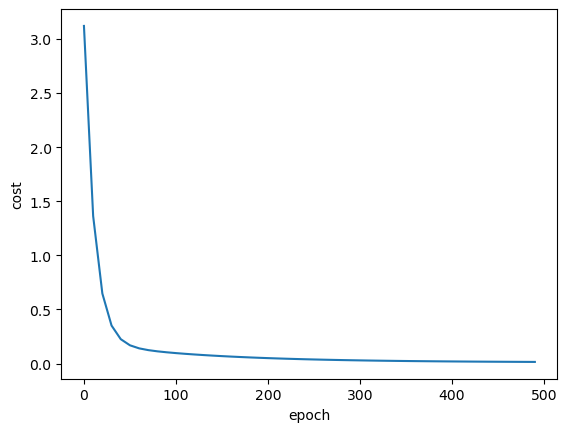

In [11]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [12]:
weights

array([-0.02302516,  0.64114258,  0.42605186,  0.34064034])

In [13]:
sx.transform([[1, 4.2, 50, 20]])[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0.        , 1.        , 0.44444444, 0.        ])

In [14]:
sy.inverse_transform([[1,0.5,0.1,0]])

array([[100. ,  57.5,  23.5,  15. ]])

In [15]:
def predict(time, voltage, current, temperature, weights, bias):
    scaled_features = sx.transform([[time, voltage, current, temperature]])[0]
    
    #scaled_SOC = np.dot(weights, scaled_features.T) + bias
    scaled_SOC = weights[0]*scaled_features[0] + weights[1]*scaled_features[1] + weights[2]*scaled_features[2] + weights[3]*scaled_features[3]+ bias
    return sy.inverse_transform([[scaled_SOC]])[0][0]


In [16]:
predict(1, 4.2, 50, 25, weights, bias)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


82.14454427476392

In [17]:
predict(1, 4.0, 50, 25, weights, bias)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


71.24512036344345

In [18]:
import random

In [19]:
random.randint(0,10)

7

In [28]:
def stochastic_gradient_descent(x, y_true, epochs, learning_rate):
    number_of_features = x.shape[1]
    weights = np.ones(shape=(number_of_features))
    bias = 0
    total_samples = x.shape[0]
    cost_list = []
    epoch_list = []
                      
    for i in range(epochs):
        random_index = random.randint(0, total_samples -1)
        sample_x  = x[random_index]
        sample_y  = y_true[random_index]
        y_predicted = np.dot(weights, sample_x.T) + bias
                      
        weight_gradient = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        bias_gradient = -(2/total_samples)*(sample_y-y_predicted)
                      
        weights = weights -  learning_rate*weight_gradient
        bias = bias - learning_rate*bias_gradient
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return weights, bias, cost, cost_list, epoch_list

In [49]:
weights, bias, cost,  cost_list, epoch_list = stochastic_gradient_descent(scaled_features, scaled_SOC.reshape(scaled_SOC.shape[0],), 5000, 0.01)

In [50]:
weights, bias, cost

(array([0.11224752, 0.63841217, 0.45249627, 0.40615203]),
 -0.3977146113961393,
 0.010560009195454011)

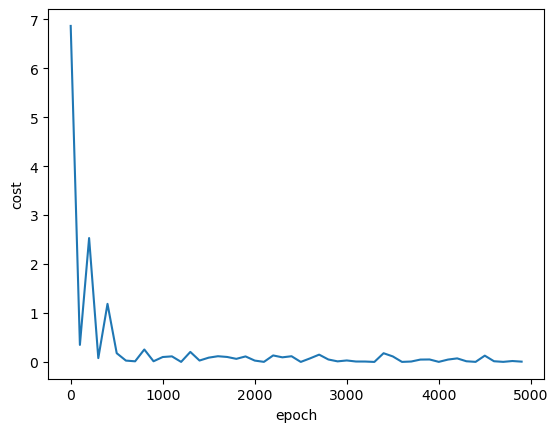

In [51]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [52]:
predict(1, 4, 100, 15, weights, bias)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


38.40923787638809

In [58]:
def mbatch_gradient_descent(x, y_true, epochs, learning_rate, batch_size):
    number_of_features = x.shape[1]
    weights = np.ones(shape=(number_of_features))
    bias = 0
    total_samples = x.shape[0]
    cost_list = []
    epoch_list = []
                      
    for i in range(epochs):
        j = 0
        for j in range(batch_size):
            random_index = random.randint(0, total_samples -1)
            sample_x  = x[random_index]
            sample_y  = y_true[random_index]
            y_predicted = np.dot(weights, sample_x.T) + bias

            weight_gradient = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
            bias_gradient = -(2/total_samples)*(sample_y-y_predicted)

            weights = weights -  learning_rate*weight_gradient
            bias = bias - learning_rate*bias_gradient
        
            cost = np.square(sample_y-y_predicted)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return weights, bias, cost, cost_list, epoch_list

In [59]:
weights, bias, cost,  cost_list, epoch_list = mbatch_gradient_descent(scaled_features, scaled_SOC.reshape(scaled_SOC.shape[0],), 500, 0.01, 5)

In [60]:
weights, bias, cost

(array([0.29468611, 0.61792928, 0.47129083, 0.4672303 ]),
 -0.519441692702566,
 0.01933210143032289)

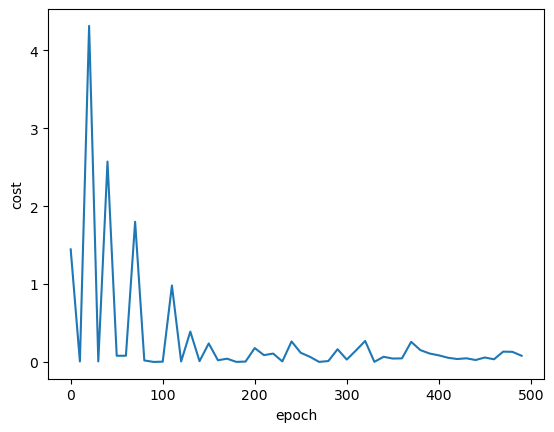

In [61]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [62]:
predict(1, 4, 100, 15, weights, bias)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


24.558814306648102